---
## Review Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
# $$
y = \beta_1 x + \beta_0
$$
where $\beta_1$ is commonly known as the *slope*, and $\beta_0$ is commonly known as the *intercept*.

---

In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
plt.style.use('ggplot')

import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

import numpy as np
import pandas as pd
from scipy import linalg

In [2]:
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

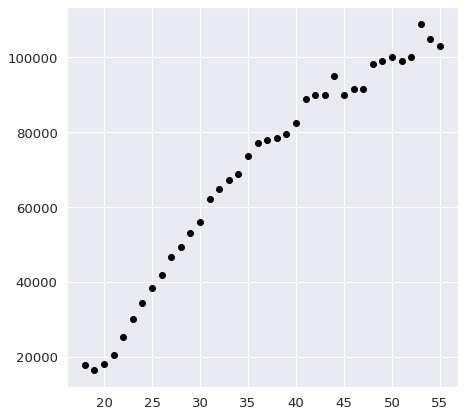

In [3]:
plt.plot(ages_x, dev_y, 'o', color='black')

---

## $$ S_{XX}= \sum_{i=1}^n (x_i - \bar x)^2 \ \ \ \ \ \ \ \
S_{XY} = \sum_{i=1}^n y_i(x_i-\bar x)
$$

## $$ \hat \beta_1 = \frac{S_{XY}}{S_{XX}} \hspace{3cm}$$

## $$ \hat \beta_0 =  \bar y - \hat \beta_1 \bar x  \hspace{3cm}$$

---

In [4]:
def my_lnreg(x,y):
    Sxx=sum((x-np.average(x))**2)
    Sxy=sum(y*(x-np.average(x)))
    beta1=Sxy/Sxx
    beta0=np.average(y)-beta1*np.average(x)
    return beta0,beta1

b0,b1=my_lnreg(ages_x,dev_y)
print("intercept:",b0)
print("slope:    ",b1)

intercept: -22913.025385709596
slope:     2525.2083378925486


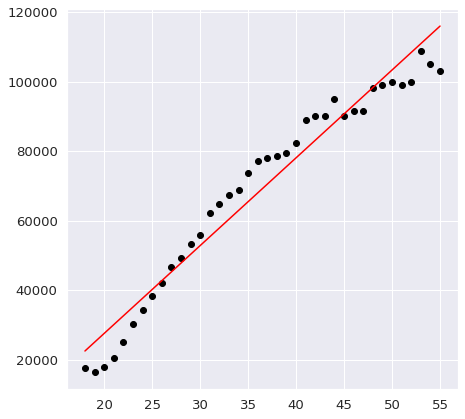

In [5]:
plt.plot(ages_x, dev_y, 'o', color='black')
plt.plot(ages_x,np.dot(b1,ages_x)+b0,color="red")

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

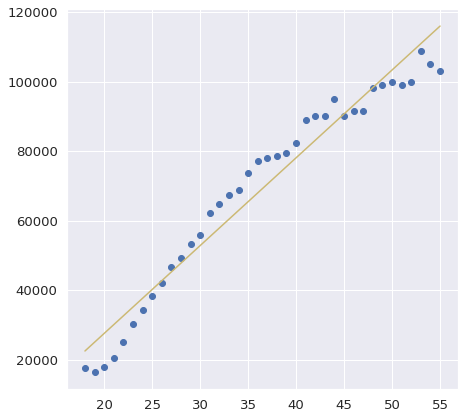

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(ages_x).reshape(-1,1), dev_y)

xfit = np.linspace(min(ages_x), max(ages_x), 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(ages_x , dev_y)
plt.plot(xfit, yfit,color="y")

---
The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

---

In [7]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2525.208337892548
Model intercept: -22913.02538570958


<h3> MULTIPLE LINEAR REGRESSION</h3>

In [8]:
data=pd.read_csv("dataset/ex3_1.csv")
data

,y,x1,x2
0,16.68,7,560
1,11.50,3,220
2,12.03,3,340
3,14.88,4,80
4,13.75,6,150
5,18.11,7,330
6,8.00,2,110
7,17.83,7,210
8,79.24,30,1460
9,21.50,5,605


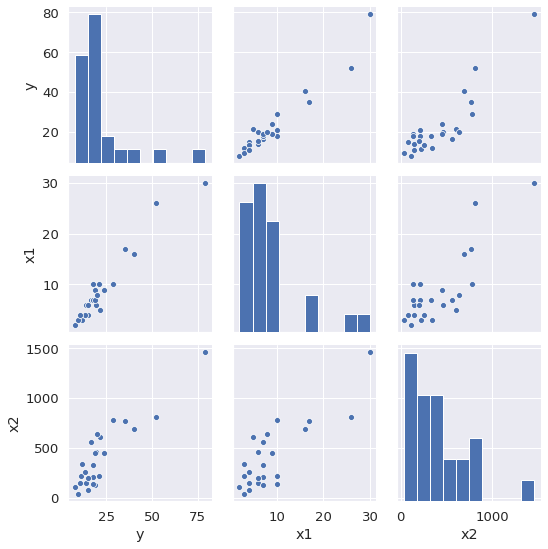

In [9]:
sns.pairplot(data)

---
A multiple regression model that might describe this relationship is
# $$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.


Similarly
# $$
y=X\beta+\epsilon
$$

where

## $$
y=
\begin{bmatrix}
y_1 \\ y_2\\ \cdots \\y_n
\end{bmatrix}
,
X=
\begin{bmatrix}
1&x_{11}&x{12}&\cdots&x_{1n}\\
1&x_{21}&x{22}&\cdots&x_{2n}\\
\cdots&\cdots&\cdots&\cdots\\
1&x_{n1}&x{n2}&\cdots&x_{nn}
\end{bmatrix}
$$

## $$
\beta=
\begin{bmatrix}
\beta_0 \\ \beta_1\\ \beta_2 \\ \cdots \\\beta_n
\end{bmatrix}
$$

---

In [10]:
y=data["y"].values
x1=data["x1"].values
x2=data["x2"].values
x0=[1 for i in range(len(x1))]

Now we build the matrix X=[1,x1,x2]

In [11]:
X = np.array([x0,x1,x2])
X

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1],
       [   7,    3,    3,    4,    6,    7,    2,    7,   30,    5,   16,
          10,    4,    6,    9,   10,    6,    7,    3,   17,   10,   26,
           9,    8,    4],
       [ 560,  220,  340,   80,  150,  330,  110,  210, 1460,  605,  688,
         215,  255,  462,  448,  776,  200,  132,   36,  770,  140,  810,
         450,  635,  150]])

---
Since
## $$y=X\beta$$
## $$X^Ty=X^TX\beta$$
therefore
## $$\beta=[X^TX]^{-1}X^Ty$$

---

In [12]:
beta=linalg.inv(X.dot(X.T)).dot(X.dot(y))
print("intercept:",beta[0])
print("slope:",beta[1:])

intercept: 2.3412311451922108
slope: [1.61590721 0.01438483]


We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

In [13]:
model.fit(np.array(data.iloc[:,1:]),y)

print("intercept:",model.intercept_)
print("slope:",model.coef_)

intercept: 2.3412311451922108
slope: [1.61590721 0.01438483]


---
<h3> Polynomial Regression</h3>

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
The idea is to take our multidimensional linear model:
# $$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
# $$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $\beta_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

---

In [14]:
data1=pd.read_csv("dataset/hardwood.csv")
data1

,x,y
0,1.0,6.3
1,1.5,11.1
2,2.0,20.0
3,3.0,24.0
4,4.0,26.1
5,4.5,30.0
6,5.0,33.8
7,5.5,34.0
8,6.0,38.1
9,6.5,39.9


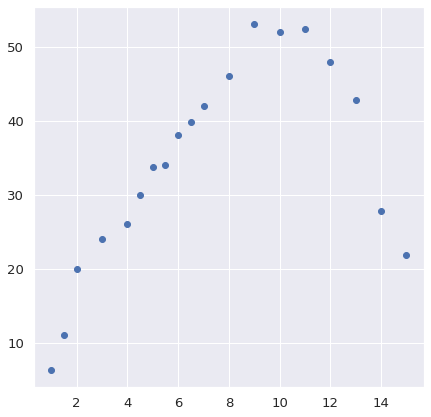

In [15]:
y=data1["y"].values
x=data1["x"].values

plt.plot(x,y,"o")

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(np.array(x).reshape(-1,1))
model.fit(x_poly,y)

LinearRegression()

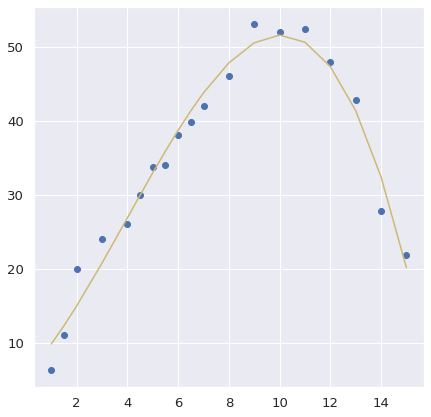

In [17]:
plt.scatter(x, y)
plt.plot(x, model.predict(poly_reg.fit_transform(np.array(x).reshape(-1,1))),color="y")

In [18]:
from heatmap import heatmap, corrplot

In [19]:
data = pd.read_csv("dataset/Advertising.csv")
data=data.iloc[:,1:]
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


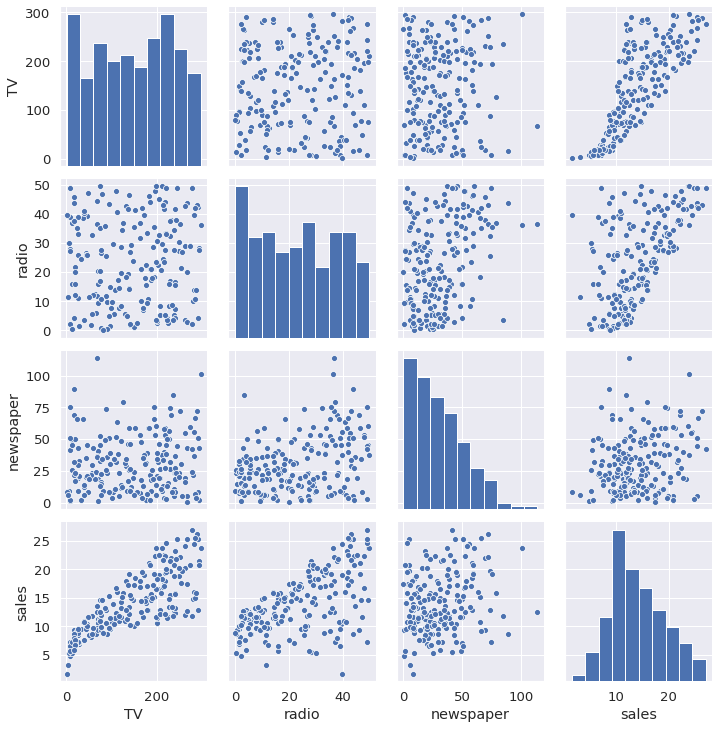

In [20]:
sns.pairplot(data)

---
### Review: Covariance and Correlation<br>

Consider the two plots shown below.Clearly the two distributions are different. However, the mean
and variance are the same in both the x and the y dimension. What is different?
![](img/Cov_corr.png)
Covariance is a quantitative measure of the extent to which the deviation of one variable from its
mean matches the deviation of the other from its mean. It is a mathematical relationship that is
defined as:
$$Cov(X,Y)=E[(X-E[X])(Y-E[Y])$$

The meaning of this mathematical definition may not be obvious at a first glance. If X and Y are both
above their respective means, or if X and Y are both below their respective means, the expression
inside the outer expectation will be positive. If one is above its mean and the other is below, the
term is negative. If this expression is positive on average, the two random variables will have a
positive correlation. We can rewrite the above equation to get an equivalent equation:
$$Cov(X,Y) = E[XY] − E[Y]E[X]$$

Correlation: covariance is interesting because it is a quantitative measurement of the relationship between
two variables. Correlation between two random variables, ρ(X,Y) is the covariance of the two
variables normalized by the variance of each variable. This normalization cancels the units out and
normalizes the measure so that it is always in the range [0, 1]:

$$ρ(X,Y)=\frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$$
Correlation measures linearity between X and Y.
$$ρ(X,Y) = 1 \ \ \ \ \ \ \ \ Y = aX + b where a=\sigma_y/\sigma_x$$
$$ρ(X,Y) = -1 \ \ \ \ \ \ \ \ Y = aX + b where a=-\sigma_y/\sigma_x$$
$$ρ(X,Y) = 0 \ \ \ \ \ \ \ \ absence of linear relationship$$
If ρ(X,Y) = 0 we say that X and Y are “uncorrelated.” If two variables are independent, then their
correlation will be 0. However, like with covariance. it doesn’t go the other way. A correlation of 0
does not imply independence.

![](img/cov_corr_1.png)
![](img/cov_corr_2.png)

---

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

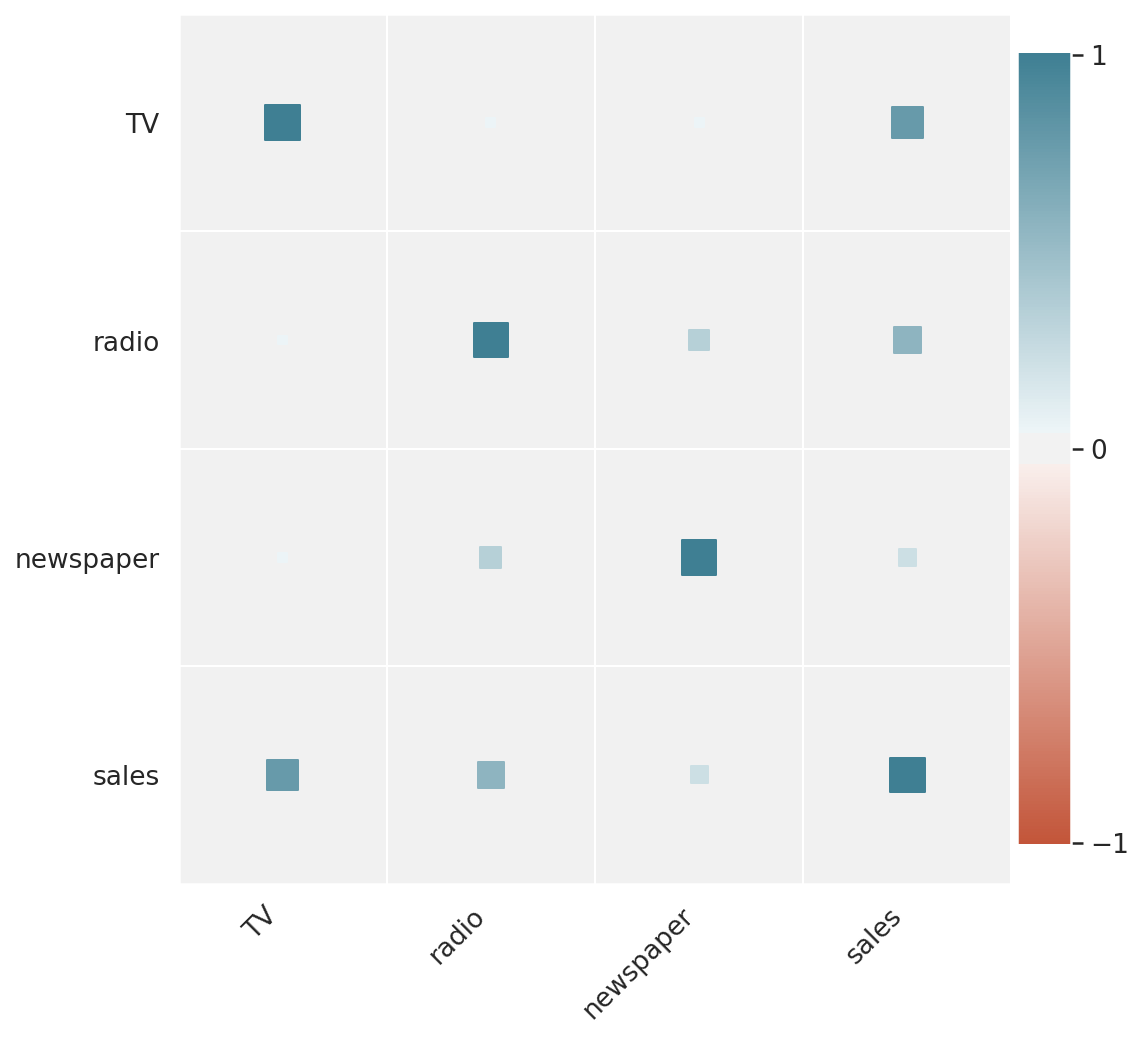

In [22]:
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=300);

In [34]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [71]:
regr = LinearRegression() 
regr.fit(x_train, y_train) 

LinearRegression()

In [72]:
regr.score(x_test, y_test)

0.8618091494407689

In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr, x, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)
print("accuracy",scores.mean())

Cross-Validation Accuracy Scores [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
accuracy 0.8853562237979616
